In [12]:
import sympy as sp
sp.init_printing(use_latex ='mathjax')

import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

Vivaflag = True

In [13]:
#Define all variables

#individual springs that correspond to individual masses
k1,k2,k3 = (0.0063,0.0044,0.0063)

#springs that connect two masses
k12, k13, k23 = (6.5*10**-5, 10**-7,10**-7)

#damping coefficients and forc
g1, g2, g3 = (5*10**4,5*10**4,5*10**4)
 
#masses
m1, m2, m3 = (2.7*10**-17,1.9*10**-17, 2.75*10**-17)

#Driving force amplitude
F = (3*10**-5)

#driving frequency (leave as variable)
wd = sp.symbols('\omega_d')

#Solve for the eigenefrequencies of steady state solutions

steadyState = sp.Matrix([[(k1/m1) + (k12/m1)+ (k13/m1), -k12/m1, -k13/m1], [-(k12/
  m2), (k2/m2) + (k12/m2) + (k23/m2), -(k23/m2)], [-k13/m3, -(k23/
  m3), (k3/m3) + (k23/m3)+ (k13/m3)]])

(e1,mult1,A), (e2,mult2,B), (e3,mult3,C)= steadyState.eigenvects()

#Neglect imaginary part because it is very small
w1, w2, w3 = (sp.sqrt(sp.re(e1)-((g1/m1)**2)/4), sp.sqrt(sp.re(e2)-((g2/m2)**2)/4), sp.sqrt(sp.re(e3)-((g3/m3)**2)/4))

In [14]:
#Solve for driving amplitudes and phase

#Matrix for complex equations of motion
driven = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k13/m1), -k12/m1, -(k13/m1)], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k23/m2), -k23/m2], [-(k13/m3), -k23/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k23/m3)+ (k13/m3)]])


#Matrices for Cramer's Rule
driven_m1 = sp.Matrix([[F/m1, -k12/m1, -(k13/m1)], [0, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k23/m2), -k23/m2], [0, -k23/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k23/m3)+ (k13/m3)]])

driven_m2 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k13/m1), F/m1, -(k13/m1)], [-k12/m2, 0, -k23/m2], [-(k13/m3),0, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k23/m3)+ (k13/m3)]])

driven_m3 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k13/m1), -k12/m1, F/m1], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k23/m2),0], [-(k13/m3), -k23/m3,0]])

#Apply Cramer's Rule
Cr1, Cr2, Cr3 = (driven_m1.det()/driven.det(),driven_m2.det()/driven.det(),driven_m3.det()/driven.det(),)

#Solve for phases for each mass
delta1 = sp.arg(Cr1)
delta2 = sp.arg(Cr2)
delta3 = sp.arg(Cr3)

#Wrap phases for plots

wrap1 = (delta1)%(2*np.pi)
wrap2 = (delta2)%(2*np.pi)
wrap3 = (delta3)%(2*np.pi)

#Solve for amplitude coefficients
amp1 = sp.re(Cr1)/sp.cos(delta1)
amp2 = sp.re(Cr2)/sp.cos(delta2)
amp3 = sp.re(Cr3)/sp.cos(delta3)

In [15]:
#Make Plots with matplotlib

#lamdify sympy expressions to be functions

delta1_f = sp.lambdify(wd,delta1)
delta2_f = sp.lambdify(wd,delta2)
delta3_f = sp.lambdify(wd,delta3)

wrap1_f=sp.lambdify(wd,wrap1)
wrap2_f=sp.lambdify(wd,wrap2)
wrap3_f=sp.lambdify(wd,wrap3)

amp1_f = sp.lambdify(wd,amp1)
amp2_f = sp.lambdify(wd,amp2)
amp3_f = sp.lambdify(wd,amp3)

#Make an array of wd values

wd_vals = np.linspace(1.46*10**7, 1.6*10**7, 500)

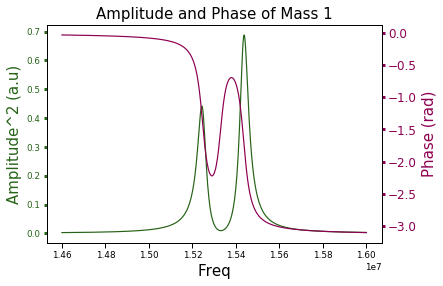

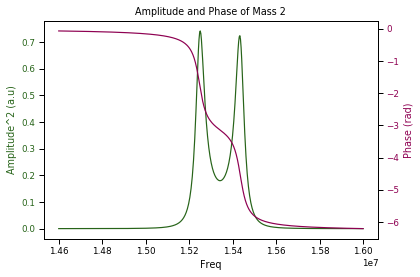

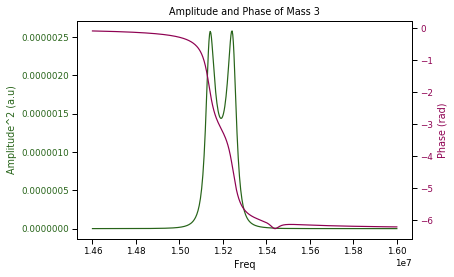

In [16]:
#Make Plots with matplotlib

#Plot first mass figure as two axis plot
fig, ax1 = plt.subplots()

color=('#276419')
ax1.set_title('Amplitude and Phase of Mass 1', size = 15)
ax1.set_xlabel('Freq', size = 15)
ax1.set_ylabel('Amplitude^2 (a.u)', size = 15, color=color)
ax1.plot(wd_vals,(amp1_f(wd_vals)**2), color = color)
ax1.tick_params(axis = 'y', labelcolor = color, color=color, width = 3, length = 3)

ax2 = ax1.twinx()

color=('#8E0152')
ax2.set_ylabel('Phase (rad)', size = 15, color=color)
ax2.plot(wd_vals,np.unwrap(delta1_f(wd_vals)), color=color)
ax2.tick_params(axis = 'y', labelcolor = color, color=color, length = 3, width = 3, labelsize = 12)

plt.show()

#Plot second mass figure as two axis plot
fig, ax1 = plt.subplots()

color=('#276419')
ax1.set_title('Amplitude and Phase of Mass 2')
ax1.set_xlabel('Freq')
ax1.set_ylabel('Amplitude^2 (a.u)', color=color)
ax1.plot(wd_vals,(amp2_f(wd_vals)**2), color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()

color=('#8E0152')
ax2.set_ylabel('Phase (rad)', color=color)
ax2.plot(wd_vals,np.unwrap(delta2_f(wd_vals)), color=color)
ax2.tick_params(axis = 'y', labelcolor = color)

plt.show()

#Plot third mass figure as two axis plot
fig, ax1 = plt.subplots()

color=('#276419')
ax1.set_title('Amplitude and Phase of Mass 3')
ax1.set_xlabel('Freq')
ax1.set_ylabel('Amplitude^2 (a.u)', color=color)
ax1.plot(wd_vals,(amp3_f(wd_vals)**2), color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()

color=('#8E0152')
ax2.set_ylabel('Phase (rad)', color=color)
ax2.plot(wd_vals,np.unwrap(delta3_f(wd_vals)), color=color)
ax2.tick_params(axis = 'y', labelcolor = color)

plt.show()

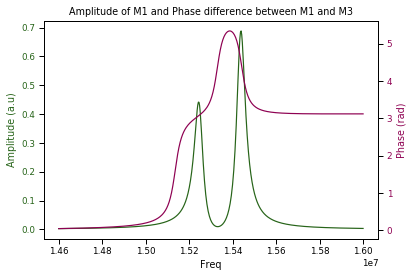

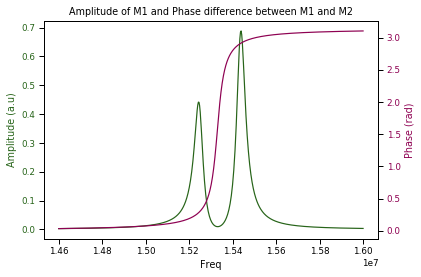

In [17]:
#Plot differences

fig, ax1 = plt.subplots()

color=('#276419')
ax1.set_title('Amplitude of M1 and Phase difference between M1 and M3')
ax1.set_xlabel('Freq')
ax1.set_ylabel('Amplitude (a.u)', color=color)
ax1.plot(wd_vals,(amp1_f(wd_vals)**2), color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()

color=('#8E0152')
ax2.set_ylabel('Phase (rad)', color=color)
ax2.plot(wd_vals,np.unwrap(delta1_f(wd_vals))-np.unwrap(delta3_f(wd_vals)), color=color)
ax2.tick_params(axis = 'y', labelcolor = color)

plt.show()


fig, ax1 = plt.subplots()

color=('#276419')
ax1.set_title('Amplitude of M1 and Phase difference between M1 and M2')
ax1.set_xlabel('Freq')
ax1.set_ylabel('Amplitude (a.u)', color=color)
ax1.plot(wd_vals,(amp1_f(wd_vals)**2), color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()

color=('#8E0152')
ax2.set_ylabel('Phase (rad)', color=color)
ax2.plot(wd_vals,np.unwrap(delta1_f(wd_vals))-np.unwrap(delta2_f(wd_vals)), color=color)
ax2.tick_params(axis = 'y', labelcolor = color)

plt.show()

In [18]:
#plot phase differences as a function of k23/k13 
#Define all variables

#individual springs that correspond to individual masses
k1,k2,k3 = (0.0063,0.0044,0.0063)

#springs that connect two masses
k12 = 6.5*10**-5
k13, k23 = (10**-7,10**-7)
k123= sp.symbols('k_13')

#damping coefficients and forc
g1, g2, g3 = (5*10**4,5*10**4,5*10**4)
 
#masses
m1, m2, m3 = (2.7*10**-17,1.9*10**-17, 2.8*10**-17)

#Driving force amplitude
F = (3*10**-5)

In [19]:
#Solve for the eigenefrequencies of two mass model
steadyState = sp.Matrix([[(k1/m1) + (k12/m1), -k12/m1], [-(k12/ m2), (k2/m2) + (k12/m2)]])
(e1,mult1,A), (e2,mult2,B)= steadyState.eigenvects()

#Neglect imaginary part because it is very small 
w1, w2= (sp.sqrt(e1)), (sp.sqrt(e2))

print (w1, w2)

15247188.2494603 15435802.2540541


In [20]:
#Solve for driving amplitudes and phase

#driving frequency (leave as variable)
wd = w1-40*10**3

#Matrix for complex equations of motion
driven = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), -k12/m1, -(k123/m1)], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2), -k123/m2], [-(k123/m3), -k123/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])


#Matrices for Cramer's Rule
driven_m1 = sp.Matrix([[F/m1, -k12/m1, -(k123/m1)], [0, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2), -k123/m2], [0, -k123/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])

driven_m2 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), F/m1, -(k123/m1)], [-k12/m2, 0, -k123/m2], [-(k13/m3),0, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])

driven_m3 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), -k12/m1, F/m1], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2),0], [-(k123/m3), -k123/m3,0]])

#Apply Cramer's Rule
Cr1, Cr2, Cr3 = (driven_m1.det()/driven.det(),driven_m2.det()/driven.det(),driven_m3.det()/driven.det(),)

#Solve for phases for each mass
delta1 = sp.arg(Cr1)
delta2 = sp.arg(Cr2)
delta3 = sp.arg(Cr3)

#Wrap phases for plots

wrap1 = (delta1)%(2*np.pi)
wrap2 = (delta2)%(2*np.pi)
wrap3 = (delta3)%(2*np.pi)

#Solve for amplitude coefficients
amp1 = sp.re(Cr1)/sp.cos(delta1)
amp2 = sp.re(Cr2)/sp.cos(delta2)
amp3 = sp.re(Cr3)/sp.cos(delta3)

In [21]:
#Make Plots with matplotlib

#lamdify sympy expressions to be functions

delta1_f = sp.lambdify(k123, delta1)
delta2_f = sp.lambdify(k123, delta2)
delta3_f = sp.lambdify(k123, delta3)

amp1_f = sp.lambdify(k123, amp1)
amp2_f = sp.lambdify(k123, amp2)
amp3_f = sp.lambdify(k123, amp3)


#Solve functions for low frequency mode
k123_vals = np.linspace(1*10**-7, 10**-4, 10**6)

phasediff1_low = np.unwrap(delta1_f(k123_vals))-np.unwrap(delta2_f(k123_vals))
phasediff2_low = np.unwrap(delta1_f(k123_vals))-np.unwrap(delta3_f(k123_vals))

amp_m1_low = amp1_f(k123_vals)
amp_m2_low = amp2_f(k123_vals)
amp_m3_low = amp3_f(k123_vals)

In [22]:
#Solve for driving amplitudes and phase

#driving frequency (leave as variable)
wd = w2 + 40*10**3

#Matrix for complex equations of motion
driven = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), -k12/m1, -(k123/m1)], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2), -k123/m2], [-(k123/m3), -k123/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])


#Matrices for Cramer's Rule
driven_m1 = sp.Matrix([[F/m1, -k12/m1, -(k123/m1)], [0, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2), -k123/m2], [0, -k123/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])

driven_m2 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), F/m1, -(k123/m1)], [-k12/m2, 0, -k123/m2], [-(k13/m3),0, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])

driven_m3 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), -k12/m1, F/m1], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2),0], [-(k123/m3), -k123/m3,0]])

#Apply Cramer's Rule
Cr1, Cr2, Cr3 = (driven_m1.det()/driven.det(),driven_m2.det()/driven.det(),driven_m3.det()/driven.det(),)

#Solve for phases for each mass
delta1 = sp.arg(Cr1)
delta2 = sp.arg(Cr2)
delta3 = sp.arg(Cr3)

#Wrap phases for plots

wrap1 = (delta1)%(2*np.pi)
wrap2 = (delta2)%(2*np.pi)
wrap3 = (delta3)%(2*np.pi)

#Solve for amplitude coefficients
amp1 = sp.re(Cr1)/sp.cos(delta1)
amp2 = sp.re(Cr2)/sp.cos(delta2)
amp3 = sp.re(Cr3)/sp.cos(delta3)

In [23]:
#Make Plots with matplotlib

#lamdify sympy expressions to be functions

delta1_f = sp.lambdify(k123, delta1)
delta2_f = sp.lambdify(k123, delta2)
delta3_f = sp.lambdify(k123, delta3)

amp1_f = sp.lambdify(k123, amp1)
amp2_f = sp.lambdify(k123, amp2)
amp3_f = sp.lambdify(k123, amp3)


#Solve functions for low frequency mode
k123_vals = np.linspace(1*10**-7, 10**-4, 10**6)

phasediff1_high = np.unwrap(delta1_f(k123_vals))-np.unwrap(delta2_f(k123_vals))
phasediff2_high = np.unwrap(delta1_f(k123_vals))-np.unwrap(delta3_f(k123_vals))

amp1_high = amp1_f(k123_vals)
amp2_high = amp2_f(k123_vals)
amp3_high = amp3_f(k123_vals)

C:\Users\vhorowit\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\vhorowit\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\vhorowit\AppData\Local\conda\conda\envs\py36\lib\site-packages\IPython\core\pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\vhorowit\AppData\Local\conda\conda\envs\py36\lib\site-packages\IPython\core\pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\vhorowit\AppData\Local\conda\conda\envs\py36\lib\site-packages\IPython\core\pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large 

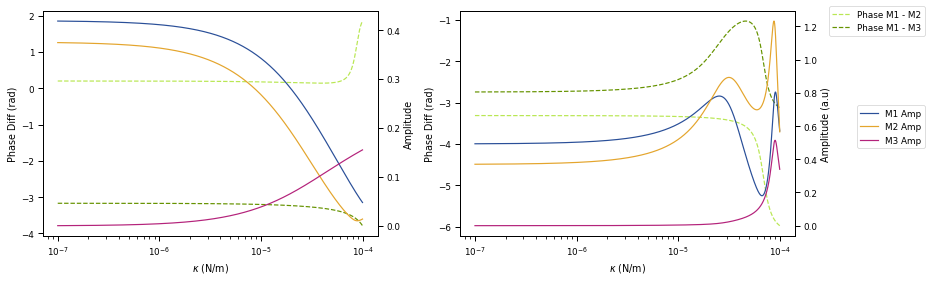

In [24]:
#Make an array of wd values
import seaborn as sns

fig, (ax1, ax3) = plt.subplots(1, 2, figsize = (13, 4))

m1_col = "#2A4F98"
m2_col = '#E4A52D'
m3_col = '#B4237B'
phasediff_1 = '#B9E753'
phasediff_2 = '#669300'

sns.set_context('paper')

#ax1.set_title('Lower Frequency Mode')
ax1.set_xlabel('$\kappa$ (N/m)')
ax1.set_ylabel('Phase Diff (rad)')
ax1.plot(k123_vals, phasediff1_low, '--', color = phasediff_1)
ax1.plot(k123_vals, phasediff2_low, '--', color = phasediff_2)
ax1.tick_params(axis = 'y')
ax1.set_xscale('log')


ax2 = ax1.twinx()

ax2.set_ylabel('Amplitude')
ax2.plot(k123_vals, amp_m1_low, color= m1_col)
ax2.plot(k123_vals, amp_m2_low, color= m2_col)
ax2.plot(k123_vals, amp_m3_low, color= m3_col)
ax2.tick_params(axis = 'y') 


#ax3.set_title('Higher Frequency Mode')
ax3.set_xlabel('$\kappa$ (N/m)')
ax3.set_ylabel('Phase Diff (rad)')
ax3.plot(k123_vals, phasediff1_high, '--', color = phasediff_1, label = "Phase M1 - M2")
ax3.plot(k123_vals, phasediff2_high, '--', color = phasediff_2, label = "Phase M1 - M3")
ax3.tick_params(axis = 'y')
ax3.set_xscale('log')
ax3.legend(bbox_to_anchor = (1.4,1.04)) 
 
ax4 = ax3.twinx()

ax4.set_ylabel('Amplitude (a.u)')
ax4.plot(k123_vals, amp1_high, color= m1_col, label = 'M1 Amp')
ax4.plot(k123_vals, amp2_high, color= m2_col, label = 'M2 Amp')
ax4.plot(k123_vals, amp3_high, color= m3_col, label = "M3 Amp")
ax4.tick_params(axis = 'y')
ax4.legend(bbox_to_anchor = (1.4,0.6))  

plt.tight_layout()

#fig.savefig('/Volumes/Aleman-Lab/Group/Papers and Abstracts/Coupled Resonator Spatial Imaging/Figures/python_exports/Mass3CouplingPlots.pdf', bbox_inches= 'tight', pad_inches=0.05)

plt.show()

File saved:
\\cas-fs1\Material-Science-Institute\Aleman-Lab\Group\Papers and Abstracts\Coupled Resonator Spatial Imaging\Figures\python_exports\Mass3CouplingPlots.pdf


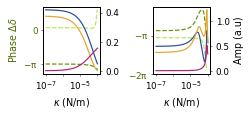

In [65]:
#Make an array of wd values
import seaborn as sns
import os

tickwidth = .5
plotticklength = 2

fig, (ax1, ax3) = plt.subplots(1, 2, figsize = (3.37, 1.5), constrained_layout=True)

m1_col = "#2A4F98"
m2_col = '#E4A52D'
m3_col = '#B4237B'
phasediff_1 = '#B9E753'
phasediff_2 = '#669300'
phaselabel_col = '#4B6C00'

sns.set_context('paper')

#ax1.set_title('Lower Frequency Mode')
ax1.set_xlabel('$\kappa$ (N/m)')
ax1.set_yticks([-np.pi, 0]) # make sure this line is joined with the one below it.
ax1.set_yticklabels(['$-$\u03C0', '0'],color=phaselabel_col)  # make sure this line is joined with the one above it.
ax1.set_ylabel('Phase $\Delta \delta$', color=phaselabel_col)
ax1.plot(k123_vals, phasediff1_low, '--', color = phasediff_1)
ax1.plot(k123_vals, phasediff2_low, '--', color = phasediff_2)
ax1.tick_params(axis = 'y')

ax2 = ax1.twinx()

#ax2.set_ylabel('Amplitude')
ax2.plot(k123_vals, amp_m1_low, color= m1_col)
ax2.plot(k123_vals, amp_m2_low, color= m2_col)
ax2.plot(k123_vals, amp_m3_low, color= m3_col)
ax2.tick_params(axis = 'y') 


#ax3.set_title('Higher Frequency Mode')
ax3.set_xlabel('$\kappa$ (N/m)')
#ax3.set_ylabel('Phase Diff (rad)')
ax3.plot(k123_vals, phasediff1_high, '--', color = phasediff_1, label = "Phase M1 - M2")
ax3.plot(k123_vals, phasediff2_high, '--', color = phasediff_2, label = "Phase M1 - M3")
ax3.tick_params(axis = 'y')
ax3.set_yticks([-np.pi, -2*np.pi],) # make sure this line is joined with the one below it.
ax3.set_yticklabels(['$-$\u03C0', '$-$2\u03C0',],color=phaselabel_col)  # make sure this line is joined with the one above it.
# see also https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html

 
ax4 = ax3.twinx()

ax4.set_ylabel('Amp (a.u)')
ax4.plot(k123_vals, amp1_high, color= m1_col, label = 'M1 Amp')
ax4.plot(k123_vals, amp2_high, color= m2_col, label = 'M2 Amp')
ax4.plot(k123_vals, amp3_high, color= m3_col, label = "M3 Amp")
ax4.tick_params(axis = 'y')

#plt.tight_layout()

for ax in [ax1,ax2,ax3,ax4]:
    ax.tick_params(direction='out', length=plotticklength, width=tickwidth)
    ax.set_xscale('log') 
    ax.set_xticks([1e-4,1e-5, 1e-6,1e-7]) # keep with the line below
    ax.set_xticklabels([' ', '$10^{-5}$', ' ', '$10^{-7}$']) # keep with the line above; only label two of the four ticks


if Vivaflag:
    savefolder = r'\\cas-fs1\Material-Science-Institute\Aleman-Lab\Group\Papers and Abstracts\Coupled Resonator Spatial Imaging\Figures\python_exports'
    savefile = 'Mass3CouplingPlots.pdf'
    fig.savefig(os.path.join(savefolder,savefile),
                bbox_inches= 'tight', pad_inches=0.05)
    print('File saved:')
    print(os.path.join(savefolder, savefile))
else:
    fig.savefig('/Volumes/Aleman-Lab/Group/Papers and Abstracts/Coupled Resonator Spatial Imaging/Figures/python_exports/Mass3CouplingPlots.pdf', bbox_inches= 'tight', pad_inches=0.05)

plt.show()

In [14]:
#Define all variables

#individual springs that correspond to individual masses
k1,k2,k3 = (0.0063,0.0044,0.0063)

#springs that connect two masses
k12, k23 = (6.5*10**-5, 0)
k13 = sp.symbols('k_13')

#damping coefficients and forc
g1, g2, g3 = (5*10**4,5*10**4,5*10**4)
 
#masses
m1, m2, m3 = (2.7*10**-17,1.9*10**-17, 2.8*10**-17)

#Driving force amplitude
F = (3*10**-5)

#driving frequency (leave as variable)
wd = w1 - 100*10**3

In [15]:
#Solve for driving amplitudes and phase

#Matrix for complex equations of motion
driven = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k13/m1), -k12/m1, -(k13/m1)], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k23/m2), -k23/m2], [-(k13/m3), -k23/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k23/m3)+ (k13/m3)]])


#Matrices for Cramer's Rule
driven_m1 = sp.Matrix([[F/m1, -k12/m1, -(k13/m1)], [0, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k23/m2), -k23/m2], [0, -k23/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k23/m3)+ (k13/m3)]])

driven_m2 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k13/m1), F/m1, -(k13/m1)], [-k12/m2, 0, -k23/m2], [-(k13/m3),0, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k23/m3)+ (k13/m3)]])

driven_m3 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k13/m1), -k12/m1, F/m1], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k23/m2),0], [-(k13/m3), -k23/m3,0]])

#Apply Cramer's Rule
Cr1, Cr2, Cr3 = (driven_m1.det()/driven.det(),driven_m2.det()/driven.det(),driven_m3.det()/driven.det(),)

#Solve for phases for each mass
delta1 = sp.arg(Cr1)
delta2 = sp.arg(Cr2)
delta3 = sp.arg(Cr3)

#Wrap phases for plots

wrap1 = (delta1)%(2*np.pi)
wrap2 = (delta2)%(2*np.pi)
wrap3 = (delta3)%(2*np.pi)

#Solve for amplitude coefficients
amp1 = sp.re(Cr1)/sp.cos(delta1)
amp2 = sp.re(Cr2)/sp.cos(delta2)
amp3 = sp.re(Cr3)/sp.cos(delta3)

In [16]:
#Make Plots with matplotlib

#lamdify sympy expressions to be functions

delta1_f = sp.lambdify(k13, delta1)
delta2_f = sp.lambdify(k13, delta2)
delta3_f = sp.lambdify(k13, delta3)

amp1_f = sp.lambdify(k13, amp1)
amp2_f = sp.lambdify(k13, amp2)
amp3_f = sp.lambdify(k13, amp3)

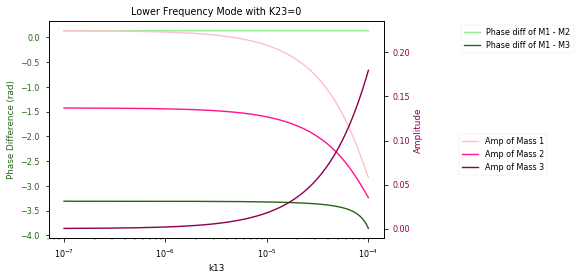

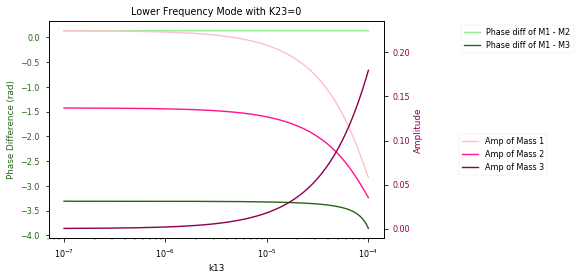

In [17]:
#Make an array of wd values

k123_vals = np.linspace(1*10**-7, 10**-4, 10**6)

fig, ax1 = plt.subplots()

color=('#276419')
ax1.set_title('Lower Frequency Mode with K23=0')
ax1.set_xlabel('k13')
ax1.set_ylabel('Phase Difference (rad)', color=color)
ax1.plot(k123_vals, np.unwrap(delta1_f(k123_vals))-np.unwrap(delta2_f(k123_vals)), color = 'lightgreen', label = "Phase diff of M1 - M2")
ax1.plot(k123_vals, np.unwrap(delta1_f(k123_vals))-np.unwrap(delta3_f(k123_vals)), color = color, label = "Phase diff of M1 - M3")
ax1.tick_params(axis = 'y', labelcolor = color)
ax1.set_xscale('log')
plt.legend(bbox_to_anchor = (1.58,1)) 

ax2 = ax1.twinx()

color=('#8E0152')
ax2.set_ylabel('Amplitude', color=color)
ax2.plot(k123_vals, amp1_f(k123_vals), color= 'pink', label = 'Amp of Mass 1')
ax2.plot(k123_vals, amp2_f(k123_vals), color='deeppink', label = 'Amp of Mass 2')
ax2.plot(k123_vals, amp3_f(k123_vals), color=color, label = "Amp of Mass 3")
ax2.tick_params(axis = 'y', labelcolor = color)
plt.legend(bbox_to_anchor = (1.5,0.5))  

plt.show()

In [13]:
#plot phase differences as a function of k23/k13 
#Define all variables

#individual springs that correspond to individual masses
k1,k2,k3 = (0.0063,0.0044,0.0063)

#springs that connect two masses
k12 = 6.5*10**-5
k13, k23 = (10**-7,10**-7)
k123= sp.symbols('k_13')

#damping coefficients and forc
g1, g2, g3 = (5*10**4,5*10**4,5*10**4)
 
#masses
m1, m2 = (2.7*10**-17,1.9*10**-17)
m3 = sp.symbols('m_3')

#Driving force amplitude
F = (3*10**-5)

In [14]:
#Solve for the eigenefrequencies of two mass model
steadyState = sp.Matrix([[(k1/m1) + (k12/m1), -k12/m1], [-(k12/ m2), (k2/m2) + (k12/m2)]])
(e1,mult1,A), (e2,mult2,B)= steadyState.eigenvects()

#Neglect imaginary part because it is very small 
w1, w2= (sp.sqrt(e1)), (sp.sqrt(e2))

print (w1, w2)

15247188.2494603 15435802.2540541


In [15]:
#Solve for driving amplitudes and phase

#driving frequency (leave as variable)
wd = w1 - 40*10**3

#Matrix for complex equations of motion
driven = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), -k12/m1, -(k123/m1)], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2), -k123/m2], [-(k123/m3), -k123/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])


#Matrices for Cramer's Rule
driven_m1 = sp.Matrix([[F/m1, -k12/m1, -(k123/m1)], [0, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2), -k123/m2], [0, -k123/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])

driven_m2 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), F/m1, -(k123/m1)], [-k12/m2, 0, -k123/m2], [-(k13/m3),0, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k123/m3)+ (k123/m3)]])

driven_m3 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k123/m1), -k12/m1, F/m1], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k123/m2),0], [-(k123/m3), -k123/m3,0]])

#Apply Cramer's Rule
Cr1, Cr2, Cr3 = (driven_m1.det()/driven.det(),driven_m2.det()/driven.det(),driven_m3.det()/driven.det(),)

#Solve for phases for each mass
delta1 = sp.arg(Cr1)
delta2 = sp.arg(Cr2)
delta3 = sp.arg(Cr3)

#Wrap phases for plots

wrap1 = (delta1)%(2*np.pi)
wrap2 = (delta2)%(2*np.pi)
wrap3 = (delta3)%(2*np.pi)

#Solve for amplitude coefficients
amp1 = sp.re(Cr1)/sp.cos(delta1)
amp2 = sp.re(Cr2)/sp.cos(delta2)
amp3 = sp.re(Cr3)/sp.cos(delta3)

In [16]:
#Make Plots with matplotlib

#lamdify sympy expressions to be functions

delta1_f = sp.lambdify((m3, k123), delta1)
delta3_f = sp.lambdify((m3, k123), delta3)

phasediff = sp.lambdify((m3, k123), delta1-delta3)
phasediff2 = sp.lambdify((m3, k123), wrap1-wrap3)

def phasefunc(m_3, k_123):
    return phasediff(m_3, k_123)

def phasefunc2(m_3, k_123):
    return phasediff2(m_3, k_123)

#np.unwrap(delta1_f(m2, k123))-np.unwrap(delta3_f(m3, k123))

m3_vals = np.linspace(2.5*10**-17, 3*10**-17, 100)
k123_vals = np.linspace(10**-3, 10**-6, 100)

a = np.empty((len(m3_vals),len(k123_vals)))
b = np.empty((len(m3_vals),len(k123_vals)))

for i in range (len(m3_vals)):
    for j in range (len(k123_vals)):
        a[i][j] = phasefunc(m3_vals[i], k123_vals[j])
        
for i in range (len(m3_vals)):
    for j in range (len(k123_vals)):
        b[i][j] = phasefunc2(m3_vals[i], k123_vals[j])

Text(0,0.5,'Mass M3')

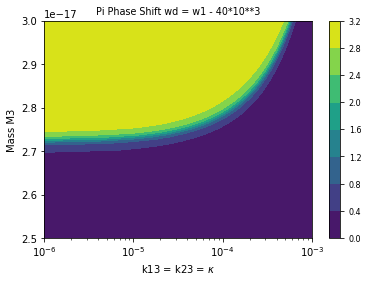

In [17]:
cp = plt.contourf(k123_vals, m3_vals, b)

sns.set_context('paper')

plt.colorbar(cp)
plt.xscale('log')
plt.title('Pi Phase Shift wd = w1 - 40*10**3')
plt.xlabel('k13 = k23 = $\kappa$')
plt.ylabel('Mass M3')

Text(0,0.5,'Mass M3')

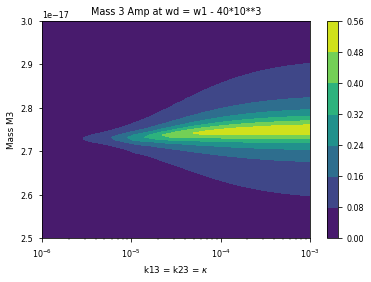

In [19]:
#Make Plots with matplotlib

#lamdify sympy expressions to be functions

amp3_f = sp.lambdify((m3, k123), amp3)


def ampfunc(m_3, k_123):
    return amp3_f(m_3, k_123)

#np.unwrap(delta1_f(m2, k123))-np.unwrap(delta3_f(m3, k123))

m3_vals = np.linspace(2.5*10**-17, 3*10**-17, 100)
k123_vals = np.linspace(10**-3, 10**-6, 100)

a = np.empty((len(m3_vals),len(k123_vals)))

for i in range (len(m3_vals)):
    for j in range (len(k123_vals)):
        a[i][j] = ampfunc(m3_vals[i], k123_vals[j])
        
cp = plt.contourf(k123_vals, m3_vals, a)

sns.set_context('paper')

plt.colorbar(cp)
plt.xscale('log')
plt.title('Mass 3 Amp at wd = w1 - 40*10**3')
plt.xlabel('k13 = k23 = $\kappa$')
plt.ylabel('Mass M3')

In [ ]:
#plot phase differences as a function of k23 with k13=0 
#Define all variables

#individual springs that correspond to individual masses
k1,k2,k3 = (0.0063,0.0044,0.0063)

#springs that connect two masses
(k12, k13) = (6.5*10**-5, 0)
k23 = sp.symbols('k_23')

#damping coefficients and forc
g1, g2, g3 = (5*10**4,5*10**4,5*10**4)
 
#masses
m1, m2 = (2.7*10**-17,1.9*10**-17)
m3 = sp.symbols('m_3')

#Driving force amplitude
F = (3*10**-5)

In [127]:
#Solve for the eigenefrequencies of two mass model
steadyState = sp.Matrix([[(k1/m1) + (k12/m1), -k12/m1], [-(k12/ m2), (k2/m2) + (k12/m2)]])
(e1,mult1,A), (e2,mult2,B)= steadyState.eigenvects()

#Neglect imaginary part because it is very small 
w1, w2= (sp.sqrt(e1)), (sp.sqrt(e2))

print (w1, w2)

15247188.2494603 15435802.2540541
15247188.2494603 15435802.2540541


In [128]:
#Solve for driving amplitudes and phase

wd = w1

#Matrix for complex equations of motion
driven = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k13/m1), -k12/m1, -(k13/m1)], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k23/m2), -k23/m2], [-(k13/m3), -k23/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k23/m3)+ (k13/m3)]])


#Matrices for Cramer's Rule
driven_m1 = sp.Matrix([[F/m1, -k12/m1, -(k13/m1)], [0, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k23/m2), -k23/m2], [0, -k23/m3, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k23/m3)+ (k13/m3)]])

driven_m2 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k13/m1), F/m1, -(k13/m1)], [-k12/m2, 0, -k23/m2], [-(k13/m3),0, -wd**2 + 
  1j*wd*g3 + (k3/m3) + (k23/m3)+ (k13/m3)]])

driven_m3 = sp.Matrix([[-wd**2 + 1j*wd*g1 + (k1/m1) + (k12/m1)+(k13/m1), -k12/m1, F/m1], [-k12/m2, -wd**2 + 
  1j*wd*g2 + (k2/m2) + (k12/m2) + (k23/m2),0], [-(k13/m3), -k23/m3,0]])

#Apply Cramer's Rule
Cr1, Cr2, Cr3 = (driven_m1.det()/driven.det(),driven_m2.det()/driven.det(),driven_m3.det()/driven.det(),)

#Solve for phases for each mass
delta1 = sp.arg(Cr1)
delta2 = sp.arg(Cr2)
delta3 = sp.arg(Cr3)

#Wrap phases for plots

wrap1 = (delta1)%(2*np.pi)
wrap2 = (delta2)%(2*np.pi)
wrap3 = (delta3)%(2*np.pi)

#Solve for amplitude coefficients
amp1 = sp.re(Cr1)/sp.cos(delta1)
amp2 = sp.re(Cr2)/sp.cos(delta2)
amp3 = sp.re(Cr3)/sp.cos(delta3)

In [129]:
#Make Plots with matplotlib

#lamdify sympy expressions to be functions

delta1_f = sp.lambdify((m3, k23), delta1)
delta3_f = sp.lambdify((m3, k23), delta3)

phasediff = sp.lambdify((m3, k23), delta1-delta3)
phasediff2 = sp.lambdify((m3, k23), wrap1-wrap3)

def phasefunc(m_3, k_23):
    return phasediff(m_3, k_23)

def phasefunc2(m_3, k_23):
    return phasediff2(m_3, k_23)

#np.unwrap(delta1_f(m2, k123))-np.unwrap(delta3_f(m3, k123))

m3_vals = np.linspace(2.5*10**-17, 3*10**-17, 100)
k23_vals = np.linspace(10**-3, 10**-6, 100)

a = np.empty((len(m3_vals),len(k23_vals)))
b = np.empty((len(m3_vals),len(k23_vals)))

for i in range (len(m3_vals)):
    for j in range (len(k23_vals)):
        a[i][j] = phasefunc(m3_vals[i], k23_vals[j])
        
for i in range (len(m3_vals)):
    for j in range (len(k23_vals)):
        b[i][j] = phasefunc2(m3_vals[i], k23_vals[j])

Text(0,0.5,'Mass M3')

Text(0,0.5,'Mass M3')

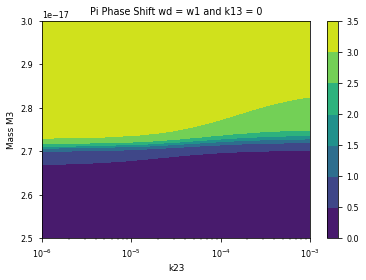

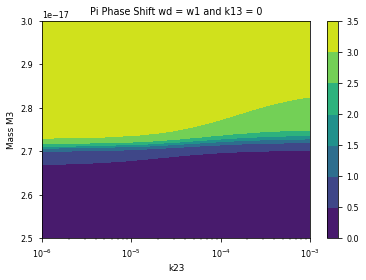

In [130]:
cp = plt.contourf(k23_vals, m3_vals, b)

sns.set_context('paper')

plt.colorbar(cp)
plt.xscale('log')
plt.title('Pi Phase Shift wd = w1 and k13 = 0')
plt.xlabel('k23')
plt.ylabel('Mass M3')